# Sinais Discretos - Representação e Manipulação

## Objetivos

Usar ferramentas computacionais (Matlab ou Python) para representar e manipular alguns sinais elementares usuais no PDS:
<ul><li>Criação e armazenamento</li>
<li>Importação</li>
<li>Amostragem e reamostragem</li>
<li>Visualização</li>
<li>Modelagem de ruído</li>
<li>Modulação</li>
<li>Simulação de SLITD's - Sistemas Lineares Invariantes de Tempo Discreto</li>


## Fundamentação Teórica

**SINAL**: É uma função matemática, de uma ou mais variáveis independentes, usada na representação de informações. 
<p>Neste roteiro, trabalharemos apenas com sinais unidimensionais (funções reais de uma única variável real), em geral, usados na representação de informações a partir de tensões ou correntes (amplitude x tempo).


## Procedimentos

### <ol><li>Criação e Armazenamento de Sinais</li>

Base de tempo (t) e Amplitude do sinal (x): 

<p>**Matlab**: <span style="font-family:Courier New; font-size:1.3em;">
 t = [0.0 0.1 0.2 0.3]; x = [1.0 3.2 2.0 8.5]</span>
<p>**Python**:

In [1]:
from numpy import array
t = array([0.0,0.1,0.2,0.3])
x = array([1.0,3.2,2.0,8.5])

<p>A estrutura de dados principal em Matlab/Python é o arranjo numérico: uma coleção ordenada de dados numéricos reais ou complexos, com uma ou mais dimensões. Os objetos de dados do processamento de sinais (sinais ou sequências numéricas) podem todos ser representados em arranjos (vetores e matrizes).

O **Matlab** e o **Python** representam sinais unidimensionais em vetores. Vetores são arranjos de dimensões $1 x N$ (vetor linha) ou $N x 1$ (vetor coluna), onde $N$ é o número de amostras existentes na sequência. Para se armazenar computacionalmente (Matlab/Python) uma sequência de valores numéricos deve-se entrar uma lista de elementos na linha de comando.
<p>Exemplo: Para criar uma sequência de cinco valores numéricos reais em um vetor linha use:
<p>**Matlab**: <span style="font-family:Courier New; font-size:1.3em;"> x = [1 2 3 4 5] </span>
<p>**Python**: 

In [2]:
x = array([1, 2, 3, 4, 5])

A sequência pode ser convertida num vetor coluna fazendo-se a transposição do vetor:

<p>**Matlab**: <span style="font-family:Courier New; font-size:1.3em;">
y = x'
 
<p>**Python**:

In [7]:
y = array([x]).transpose()       # ou: y = array([x]).T
print x
print y

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]


Vetores colunas podem ser estendidos naturalmente para o caso de sinais multicanais (multidimensionais), no qual cada canal é representado por uma coluna de um arranjo tipo matriz.

Outra forma de se criar vetores de dados sequenciais é usando o operador dois pontos do **Matlab** ou a função **arange( )** do pacote *Numpy* do **Python**. 
<p>Exemplo: Considere o tempo de um segundo de um sinal amostrado a 100 Hz. O vetor de tempo apropriado para esse sinal seria:

<p>**Matlab**: <span style="font-family:Courier New; font-size:1.3em;">t = 0:1e-2:1;</span>
<p>**Python**:

In [14]:
from numpy import arange
t = arange(0.,1.01,1.e-2)
t

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

Você também pode usar a função *linspace( )* para criar o mesmo vetor com os dados de tempo:
<p>**Matlab**: <span style="font-family:Courier New; font-size:1.3em;">t = linspace(0,1,100);</span>
<p>**Python**:

In [16]:
from numpy import linspace
t = linspace(0.,1.,100)
t

array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.69

Exercício: O que faz o seguinte *script*?

In [17]:
from numpy import sin
t1 = array([0, .1, .2, .3])
t2 = arange(0,0.4,0.1)
t3 = linspace(0, 0.3, 4)
t  = array([t1,t2,t3]).T
x  = sin(t)
print x

[[ 0.          0.          0.        ]
 [ 0.09983342  0.09983342  0.09983342]
 [ 0.19866933  0.19866933  0.19866933]
 [ 0.29552021  0.29552021  0.29552021]]


### <ol><li value=2>Visualização de Sinais</li>

Vamos executar alguns comandos para:
<ul><li>Visualizar a amplitude do sinal em função do tempo</li>
<li>Funções utilizadas: <span style="font-family:Courier New; font-size:1.em;">plot, stem, stairs</span>
<li>Ouvir um sinal de áudio: <span style="font-family:Courier New; font-size:1.em;">sound</span>

Obs.: os comandos <span style="font-family:Courier New; font-size:1.em;">sound/soundsc</span> não funcionarão adequadamente se o hardware do seu computador não estiver instalado corretamente. Se for este o caso, então apenas visualize os sinais graficamente ao invés de ouvi-los.

Experimente:


Populating the interactive namespace from numpy and matplotlib


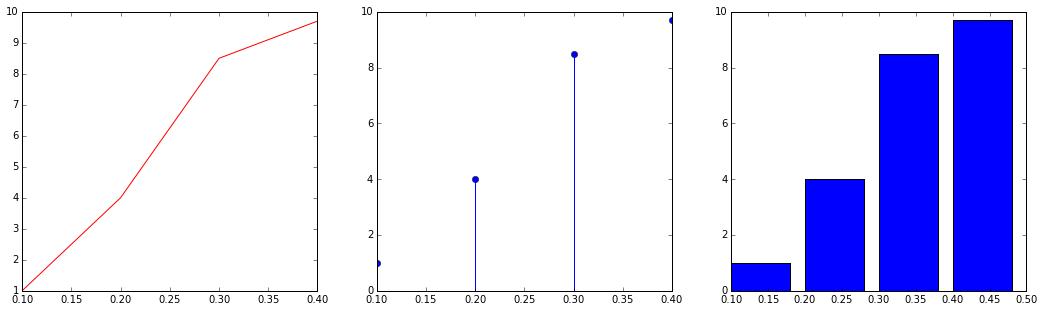

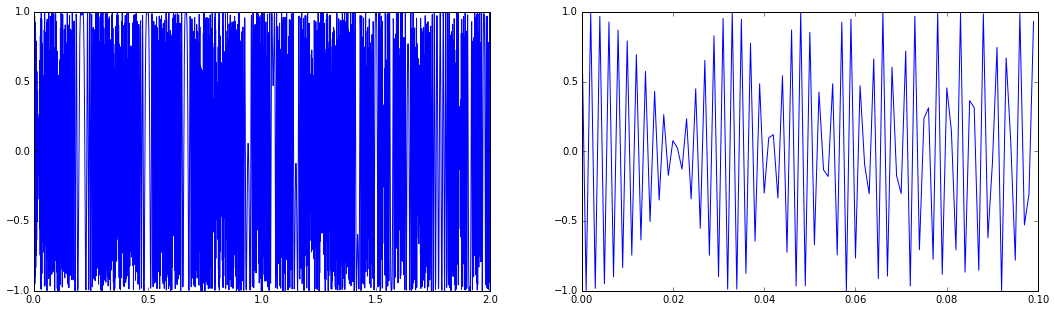

In [59]:
% pylab inline
from numpy import pi, cos
from pylab import subplots, subplot, plot, stem, bar

t = array([0.1, 0.2, 0.3, 0.4])
x = array([1.0, 4.0, 8.5, 9.7])
subplots(figsize=(18,5))        # estipula espaço físico para os gráficos
subplot(131); plot(t,x,'r')
subplot(132); stem(t,x)
subplot(133); bar(t,x, width=0.08)

fs = 1000; 
ts = arange(0,2,1./fs,dtype=float)
f = 250. + 240.*cos(2.*pi*ts)
x = cos(2*pi*f*ts)

figure()
subplots(figsize=(18,5))        # estipula espaço físico para os gráficos
subplot(121); plot(ts,x)
subplot(122); plot(ts[0:100],x[0:100])

Exercício: Execute o script mostrado a seguir e indique o resultado gerado pelo mesmo.

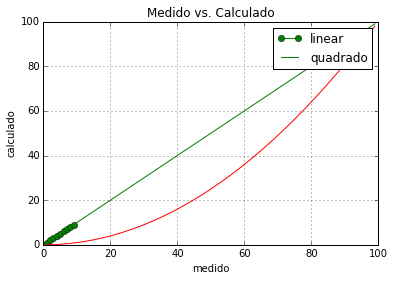

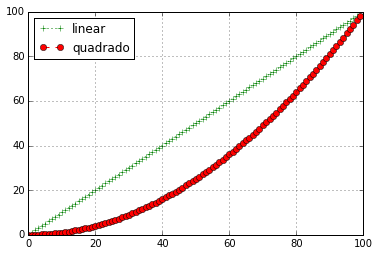

In [53]:
from matplotlib.pylab import plot, setp, xlabel, ylabel, title, step, \
                             grid, figure, draw, gca, legend, xlim, ylim
from numpy import arange

plot(range(10)); xlabel('medido'); ylabel('calculado'); title('Medido vs. Calculado'); grid(True)
meugraf = gca()          # pega a referência do gráfico atual (criado pelo comando 'plot')
linha = meugraf.lines[0] # pega a ref. da primeira linha
linha.set_marker('o')    # ajusta as propriedades usando os métodos 'set_algumapropriedade()'
setp(linha, color='g')   # ou usando a função 'setp()'
draw()                   # aplica novas propriedades e redesenha a figura

x = arange(100)
linear = arange(100)
quad = [v * v for v in arange(0, 10, 0.1)]
plot(x,linear,x,quad)    # adiciona linhas em um gráfico
legend(('linear', 'quadrado'))
figure()                 # cria novo gráfico (clf)
plot(x,linear,'g:+',x,quad,'r--o'); grid(True)
leg = legend(('linear', 'quadrado'), loc='upper left')

### <ol><li value=3>Geração de Sinais</li>

Crie um vetor com a base de tempo para o sinal:	

In [38]:
t = arange(0.,2.1,0.1)

Crie um sinal como função do tempo:

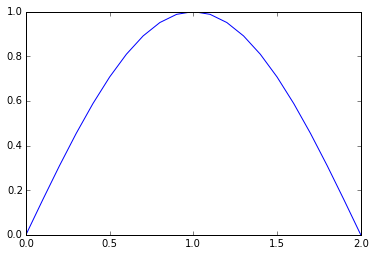

In [39]:
x = sin(pi*t/2)
plot(t,x)

Funções úteis na geração de sinais:
<ul><li>Não periódicas:  ones(), zeros(), step(), impulse(), gensig()</li>
<li>Periódicas: sin(), cos(), square(), sawtooth()</li>

#### Sinais Não Periódicos

**Degrau Unitário** (*step*): $u[n]$

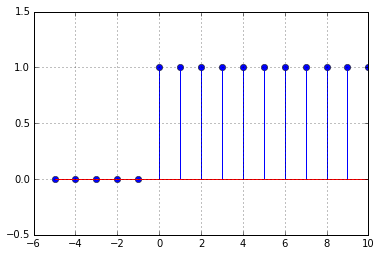

In [65]:
n = arange(-5,11)
u = (n >= 0) * 1.                     # programação funcional
stem(n,u); ylim(-0.5,1.5); grid('on')

_Experimente_:  Outra forma de gerar o sinal *Degrau Unitário*.

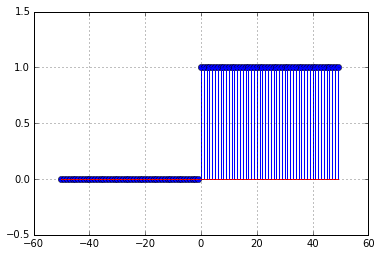

In [63]:
from numpy import ones, zeros
n = arange(-50,50)
u = zeros(len(n))
u[len(n)/2:] = ones(len(n)/2)               # manipulação de índices
stem(n,u); ylim(-0.5,1.5); grid(True)

**Impulso Unitário**:

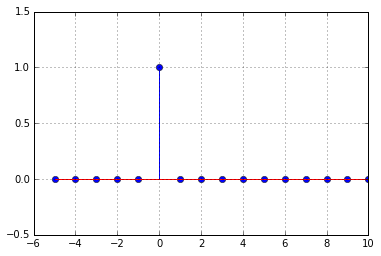

In [66]:
n = arange(-5,11)
y = (n == 0) * 1;
stem(n,y); ylim(-0.5,1.5); grid('on')

**Rampa**:

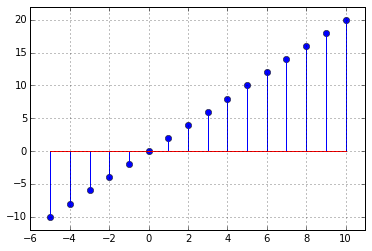

In [52]:
y = 2*n;
stem(n,y); xlim(-6,11); ylim(-12,22); grid('on')

**Trem de Impulsos** (Janela) com largura *Larg*:

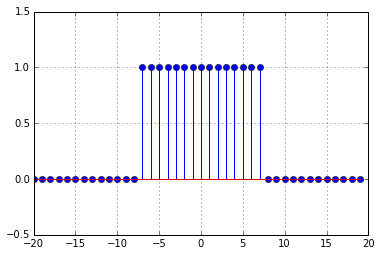

In [73]:
larg = 15;                             # largura da janela (somente valor ímpar)
mtd = (larg-1)/2                       # metade da largura
n = arange(-20,20)                     # base de tempo
w = zeros(len(n))                      # inicialização com zeros
w[(n >= -mtd)*(n <= mtd)] = 1.         # amostras unitárias
stem(n,w); ylim(-0.5,1.5); grid(True)

Usando função definida pelo usuário:

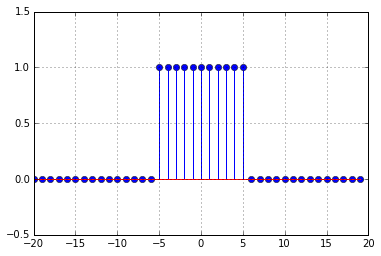

In [75]:
def janela(n,larg):                        # função: cria sinal 'janela'
    mtd = (larg-1)/2                       # metade da largura
    w = zeros(len(n))                      # inicialização com zeros
    w[(n >= -mtd)*(n <= mtd)] = 1.         # amostras unitárias
    return w

n = arange(-20,20)                         # base de tempo
w = janela(n,11)                           # sinal 'janela'
stem(n,w); ylim(-0.5,1.5); grid(True)

#### Sinais Periódicos

**Senóides**: 
<p>Parâmetros:
<ul><li>Amplitude, $A$</li>
<li>Freqüência, $f$</li>
<li>Fase, $\phi$</li>
<li>Deslocamento Vertical (polarização, oﬀset), $B$</li>

Forma geral:  $x = A.sen(2\pi f.t+\phi) + B$

Exemplo: *Script* gerar uma senóide com as seguintes especificações:
<p>A = 5; f = 2 Hz; $\phi=\pi/8$ rad; B = 2.

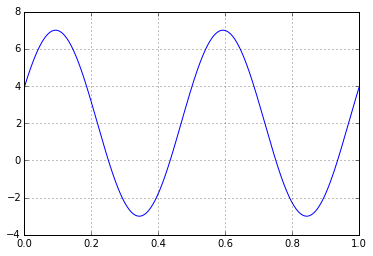

In [77]:
t = linspace(0,1,1001)
Ampl = 5.
freq = 2.
fase = pi/8
off = 2.
x = Ampl * sin(2*pi*freq*t + fase) + off
plot(t, x); grid(True)

**Sinais Quadrados**:  
<p>Formas de onda quadradas devem ter especificado o ciclo de trabalho (percentual de tempo em que a amplitude do sinal fica em nível alto – *duty cycle*).

Exemplo:  *Duty cycle* de 50% (padrão) e frequência de 4 Hz.

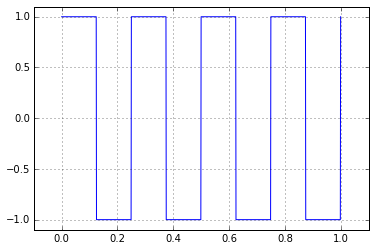

In [88]:
from pylab import axis
from scipy.signal import square, sawtooth

t = linspace(0,1,1001)
freq = 4.                             # 4 ciclos/seg
quad = square(2*pi*freq*t)
plot(t,quad); axis([-0.1,1.1,-1.1,1.1]); grid(True)

Mudando o *duty cicle* para 75%:

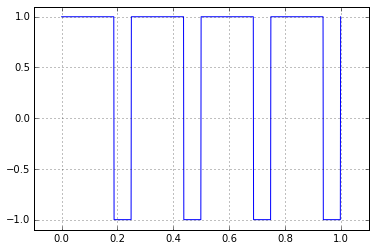

In [87]:
quad = square(2*pi*freq*t, 0.75)
plot(t,quad); axis([-0.1,1.1,-1.1,1.1]); grid(True)

**Dente-de-Serra**:  
<p>Assim como as ondas quadradas, esses sinais precisam de um parâmetro que indica a localização do pico da onda.

Exemplo:  Pico no final do período (padrão) e frequência de 3 Hz (pico/seg).

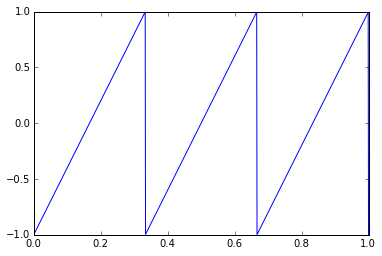

In [89]:
freq = 3.
ds = sawtooth(2*pi*freq*t)
plot(t,ds)

Modificando a posição do pico do sinal para a metade do período:

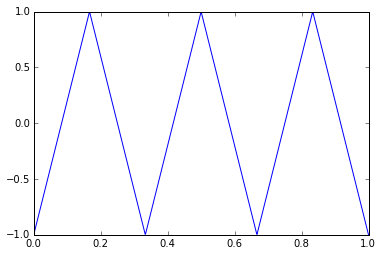

In [90]:
ds = sawtooth(2*pi*freq*t,0.5)
plot(t,ds)

### Exemplos

<ol><li>**Componentes simétricas dos sinais**: todo sinal pode ser decomposto em suas componentes de simetria **par** ("*even*", em inglês) e de simetria **ímpar** ("*odd*", em inglês).

$$x[n]=x_{par}[n]+x_{ímpar}[n]$$$\;\;\;\;\;\textrm{onde:}$

$$x_{par}[n]=\frac{x[n]+x[-n]}{2}\;\;\;\;\;\;\;\;\;\;\;\;x_{ímpar}[n]=\frac{x[n]-x[-n]}{2}$$

Vamos usar a função <span style="font-family:Courier New; font-size:1.em;">**[xe,xo,m] = evenodd(x,n)**</span> para decompor sinais discretos em suas componentes simétricas. <p>Vamos começar com o sinal *janela* ("*boxcar*", em inglês) deslocado: <span style="font-family:Courier New; font-size:1.em;">  x[n] = u[n] – u[n-3]</span>. 

Verifique graficamente o resultado da decomposição e comprove a recuperação do sinal original a partir da soma das componentes simétricas.

In [1]:
# -*- coding: utf-8 -*-
""" Funções de Apoio para decomposição de sinal em componentes simétricas (par e ímpar)
@author: Prof. Cláudio, Ago/2014.
"""
from numpy import arange, zeros, imag

def impseq(n0=0, ne=-10, nd=10):
  """ Gera uma sequência Impulso Unitário deslocada de 'n0' amostras
    à direita, no intervalo de tempo de 'ne' a 'nd'
    -------------------------------------------------------------
    Uso:  u, n = impseq(n0,ne,nd)
      u - vetor com as amplitudes do sinal impulso unitário
      n - vetor com a base de tempo
  """
  n = arange(ne,nd+1)       # vetor para a base de tempo
  i = zeros(len(n))         # vetor com amplitudes do sinal impulso
  i[n == n0] = 1.           # ajuste das amplitudes do sinal impulso
  return i, n

def stepseq(n0=0, ne=-10, nd=10):
  """ Gera uma sequência Degrau Unitário deslocada de 'n0' amostras
    à direita, no intervalo de tempo de 'ne' a 'nd'
    -------------------------------------------------------------
    Uso:  u, n = stepseq(n0,ne,nd)
      u - vetor com as amplitudes do sinal degrau
      n - vetor com a base de tempo
  """
  n = arange(ne,nd+1)       # vetor para a base de tempo
  u = zeros(len(n))         # vetor com amplitudes do sinal degrau
  u[n >= n0] = 1.           # ajuste das amplitudes do sinal degrau
  return u, n

def evenodd(x,n):
  """ Decompõe o sinal 'x[n]' em suas componentes simétricas (par e ímpar)
    --------------------------------------------------------------------
    Uso:  xe,xo,m = evenodd(x,n)
      xe - vetor com as amplitudes da componente par
      xo - vetor com as amplitudes da componente ímpar
      m  - vetor com a base de tempo das duas componentes
  """
  if any(imag(x) != 0):
    print u'sinal x não é uma sequência real!'
    return 0,0,0
  m = -n[::-1]              # base de tempo rebatida em relação ao eixo vertical
  m1 = min([min(m),min(n)]) 
  m2 = max([max(m),max(n)])
  m = arange(m1,m2+1)       # nova base de tempo comum às duas componentes
  n1 = arange(0,len(n))
  x1 = zeros(len(m))
  nm = n[0]-m[0]            # distância entre as bases temporais em unid.s de tempo 
  x1[n1+nm] = x
  xe = 0.5*(x1 + x1[::-1])  # componente par
  xo = 0.5*(x1 - x1[::-1])  # componente ímpar
  return xe, xo, m

In [2]:
u1, n = stepseq(0,-5,5)     # sinal degrau
u2, n = stepseq(3,-5,5)     # sinal degrau deslocado de 4 amostras à direita (atrasado)
w = u1 - u2
[we,wo,m] = evenodd(w,n)    # componentes simétricas: par e ímpar
wr = we + wo                # sinal janela recuperado a partir das componentes simétricas

Populating the interactive namespace from numpy and matplotlib


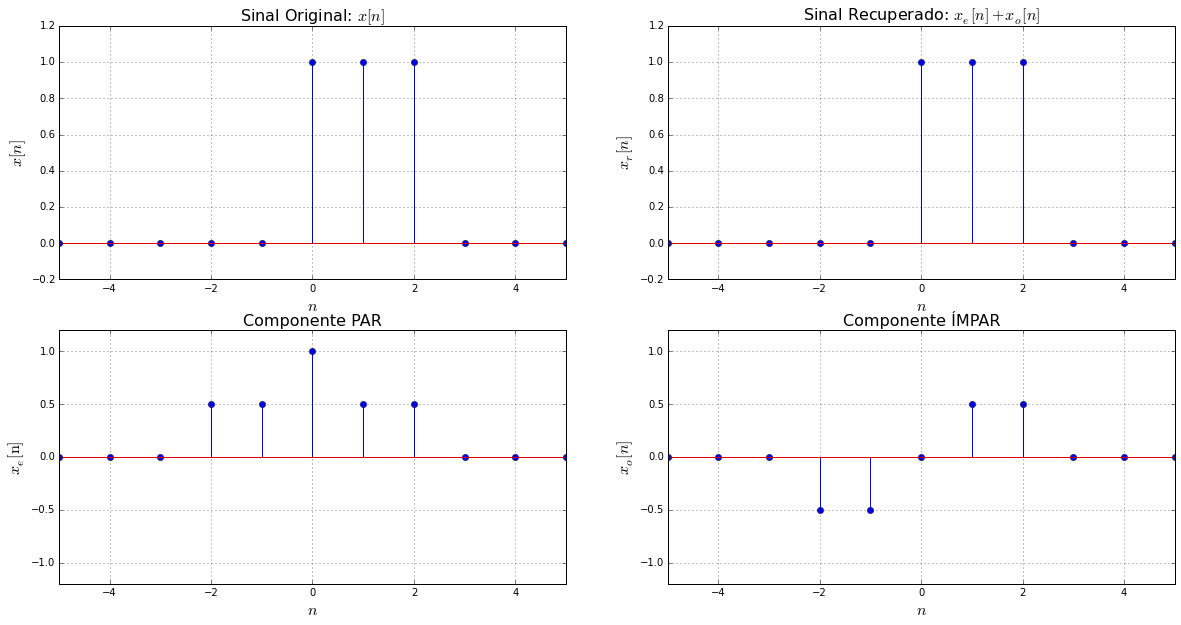

In [3]:
% pylab inline
from pylab import subplots, subplot, stem, title, xlabel, ylabel, axis, grid, tight_layout

# Gráficos dos sinais: Original 'w' e Recuperado 'wr'
subplots(figsize=(20,10))
subplot(2,2,1); stem(n,w); grid('on'); axis([-5, 5, -0.2, 1.2])
title(r'Sinal Original: $\itx\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16), ylabel(r'$\itx\rm[\itn\rm]$',fontsize=16)
 
subplot(2,2,2); stem(m,wr); grid('on'); axis([-5, 5, -0.2, 1.2])
title(r'Sinal Recuperado: $\itx_e\rm[\itn\rm] + \itx_o\rm[\itn\rm]$',fontsize=16)
xlabel(r'$\itn$',fontsize=16), ylabel(r'$\itx_r\rm[\itn\rm]$',fontsize=16)

subplot(2,2,3); stem(m,we); grid('on'); axis([-5, 5, -1.2, 1.2])
title('Componente PAR',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\itx_e\rm[\it\rmn]$',fontsize=16)

subplot(2,2,4); stem(m,wo); grid('on'); axis([-5, 5, -1.2, 1.2])
title(u'Componente ÍMPAR',fontsize=16)
xlabel(r'$\itn$',fontsize=16); ylabel(r'$\itx_o\rm[\itn\rm]$',fontsize=16)